<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
%%capture
%pip install statsmodels

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Task 1: Familiarize yourself with the dataset 

The following describes the dataset variables:

 - CRIM - per capita crime rate by town
 - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS - proportion of non-retail business acres per town.
 - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 - NOX - nitric oxides concentration (parts per 10 million)
 - RM - average number of rooms per dwelling
 - AGE - proportion of owner-occupied units built prior to 1940
 - DIS - weighted distances to five Boston employment centres
 - RAD - index of accessibility to radial highways
 - TAX - full-value property-tax rate per $10,000
 - PTRATIO - pupil-teacher ratio by town
 - LSTAT - % lower status of the population
 - MEDV - Median value of owner-occupied homes in $1000's

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Task 2: Generate basic statistics and visualizations for upper management. 

In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


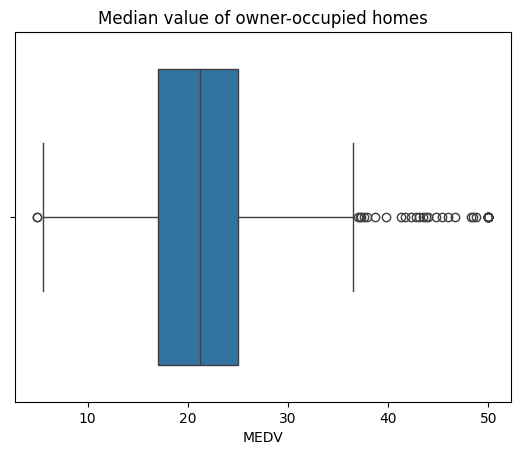

In [5]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(x = 'MEDV', data = boston_df)
plt.title('Median value of owner-occupied homes')
plt.show()

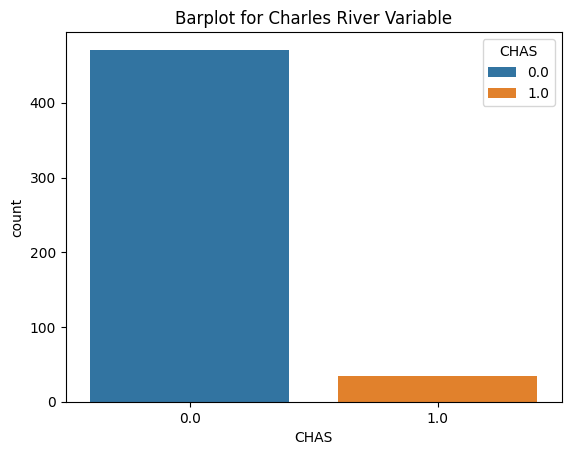

In [6]:
# Provide a bar plot for the Charles river variable
sns.countplot(x='CHAS', hue='CHAS', data=boston_df)
plt.title('Barplot for Charles River Variable')
plt.show()

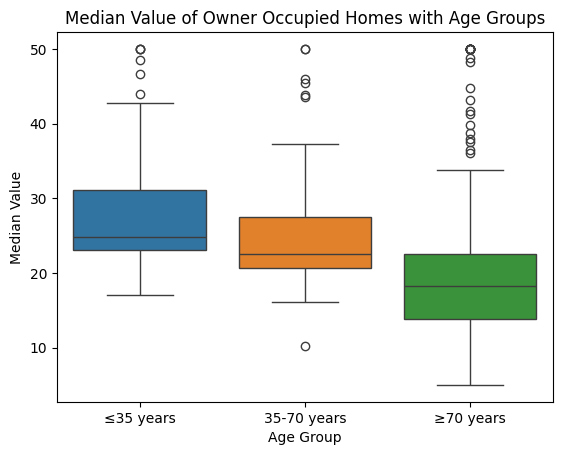

In [7]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
# Discretize AGE into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], 
                                bins=[0, 35, 70, 100], 
                                labels=['≤35 years', '35-70 years', '≥70 years'])

sns.boxplot(x='AGE_group', y='MEDV', hue='AGE_group', data=boston_df)
plt.title('Median Value of Owner Occupied Homes with Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value')
plt.show()

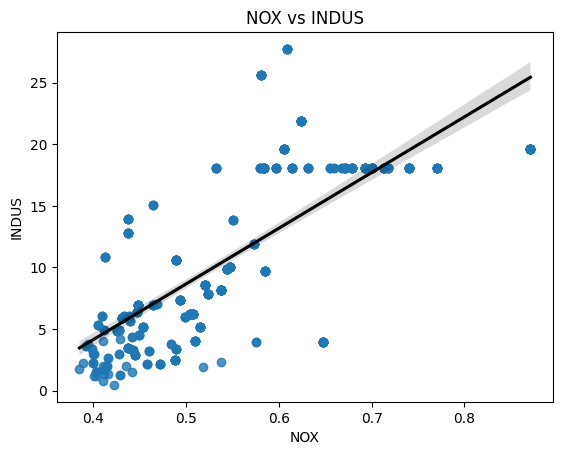

In [8]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.regplot(x='NOX', y='INDUS', data=boston_df, line_kws={'color': 'black'})
plt.title('NOX vs INDUS')
plt.show()

[]

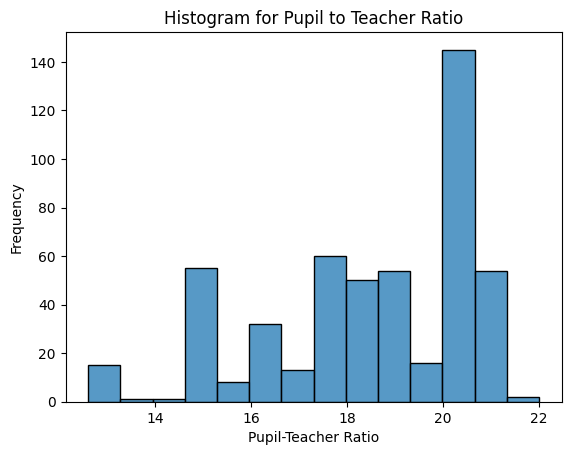

In [9]:
# Create a histogram for the pupil to teacher ratio variable
# sns.countplot(x='PTRATIO', Hue='PTRATIO', data=boston_df)
sns.histplot(boston_df['PTRATIO'])
plt.title('Histogram for Pupil to Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.plot()

### Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis: 'There is no significant difference in median value of houses bounded by Charles River.'  
Alternative Hypothesis: 'There is a significant difference in median value of houses bounded by Charles River.'  
Significance Level: $\alpha=0.05$

In [10]:
from scipy import stats
alpha = 0.05

# Extract MEDV for CHAS=1 and CHAS=0
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Step 1: Test for homogeneity of variances (Levene's Test)
levene_stat, levene_p = stats.levene(chas_0, chas_1)
print(f"Levene's Test for Homogeneity of Variances: Statistic={levene_stat:.4f}, p-value={levene_p:.4f}")

# Step 2: Independent Samples T-test (equal_var based on Levene's result)
t_stat, t_p = stats.ttest_ind(chas_0, chas_1, equal_var=(levene_p > alpha))
print(f"Independent Samples T-test: Statistic={t_stat:.4f}, p-value={t_p:.4f}")
print(f"Mean MEDV for CHAS=1: {chas_1.mean():.2f}, Mean MEDV for CHAS=0: {chas_0.mean():.2f}\n")

print(f"{'Reject the null hypothesis' if t_p < alpha else 'Fail to reject the null hypothesis'}.")
print("Conclusion: There is a significant difference in median value of houses bounded by Charles River")

Levene's Test for Homogeneity of Variances: Statistic=4.5903, p-value=0.0326
Independent Samples T-test: Statistic=-3.1133, p-value=0.0036
Mean MEDV for CHAS=1: 28.44, Mean MEDV for CHAS=0: 22.09

Reject the null hypothesis.
Conclusion: There is a significant difference in median value of houses bounded by Charles River


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis: 'There is no difference in Median values of houses for proportion owner occupied units built prior to 1940.'  
Alternate Hypothesis: 'There is a significant difference in Median values of houses for proportion owner occupied units built prior to 1940.'  
Significance Level: $\alpha=0.05$

In [11]:
alpha = 0.05
# Group AGE into 3 categories:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], 
                                bins=[0, 35, 70, 100], 
                                labels=['≤35 years', '35-70 years', '≥70 years'])

# Extract MEDV for each group
group1 = boston_df[boston_df['AGE_group'] == '≤35 years']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '35-70 years']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '≥70 years']['MEDV']

# One-way ANOVA
f_stat, anova_p = stats.f_oneway(group1, group2, group3)
print(f"One-way ANOVA: F-statistic={f_stat:.4f}, p-value={anova_p:.4f}")
print(f"Mean MEDV by Group: <30={group1.mean():.2f}, 30-70={group2.mean():.2f}, >70={group3.mean():.2f}\n")

print(f"{'Reject the null hypothesis' if anova_p < alpha else 'Fail to reject the null hypothesis'}.")
print("Conclusion: There is a significant difference in Median values of houses for proportion owner occupied units built prior to 1940")

One-way ANOVA: F-statistic=36.4076, p-value=0.0000
Mean MEDV by Group: <30=27.78, 30-70=24.95, >70=19.79

Reject the null hypothesis.
Conclusion: There is a significant difference in Median values of houses for proportion owner occupied units built prior to 1940


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis: 'There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.'  
Alternate Hypotheis: 'There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.'  
Significance Level: $\alpha=0.05$

In [12]:
alpha = 0.05
corr_r, corr_p = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation: r={corr_r:.4f}, p-value={corr_p:.4e}\n")

print(f"{'Reject the null hypothesis' if corr_p < alpha else 'Fail to reject the null hypothesis.'}")
print(f"Since pearson correlation is {corr_r:.4f}, we see a positive linear correlation, which was also confirmed from the visualization in Task 2.")
print("Conclusion: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Pearson Correlation: r=0.7637, p-value=7.9134e-98

Reject the null hypothesis
Since pearson correlation is 0.7637, we see a positive linear correlation, which was also confirmed from the visualization in Task 2.
Conclusion: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.


#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis: 'DIS has no significant impact on MEDV (The regression coefficient for DIS is 0).'  
Alternate Hypotheis: 'DIS has a significant impact on MEDV (The regression coefficient for DIS is not 0).'  
Significance Level: $\alpha=0.05$

In [13]:
alpha = 0.05
X = boston_df['DIS']
X = sm.add_constant(boston_df['DIS'])  # Independent variable 
y = boston_df['MEDV']                  # Dependent variable

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

# Extract key results
beta0 = model.params['const']
beta1 = model.params['DIS']
p_val = model.pvalues['DIS']
print(f"\nFitted Model: MEDV = {beta0:.4f} + {beta1:.4f} * DIS")
print(f"{'Reject the null hypothesis' if p_val < alpha else 'Fail to reject the null hypothesis'}.")
print(f"Conclusion: DIS coeff indicates that each additional unit increase in the weighted distance to Boston's five employment centers is associated with an average increase of approximately {beta1:.4f} thousand dollars in median house value.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.21e-08
Time:                        10:08:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0d29f40d-7cf2-43cd-95de-e7679bdd5fb9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>